In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

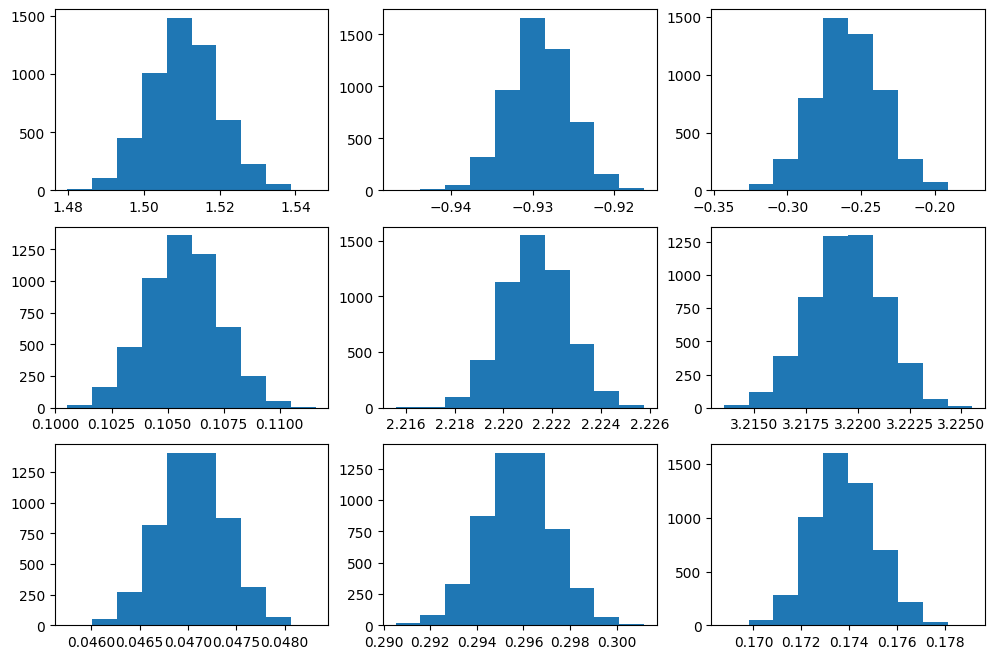

In [63]:
chain = np.load("./mcmc_chain.npy")

columns = ["a", "b", "c", "rmean", "smean", "imean", "s1", "s2", "s3"]
df = pd.DataFrame(data=chain, columns=["a", "b", "rmean", "smean", "imean", "s1", "s2", "s3"])
df["c"] = df["rmean"] - df["a"] * df["smean"] - df["b"] * df["imean"]
df_alt = df[columns]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

for i, ax in enumerate(fig.axes):
    # if i == 8:
    #     continue
    col = columns[i]
    ax.hist(df[col])

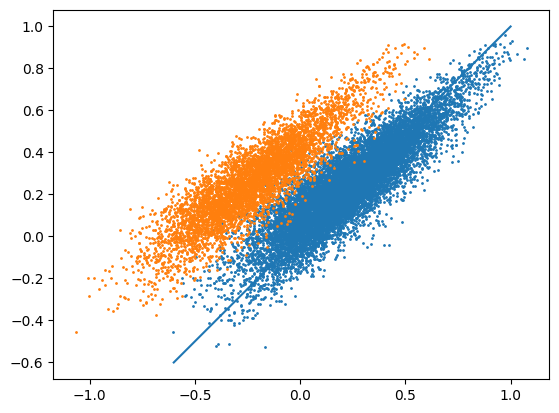

In [76]:
# Load FP fits
fp_fits = pd.read_csv("../../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/fp_fits.csv", index_col=0).loc["ALL_COMBINED"]
fp_fits["c"] = fp_fits["rmean"] - fp_fits["a"] * fp_fits["smean"] - fp_fits["b"] * fp_fits["imean"]
a = np.round(fp_fits["a"], 3)
b = np.round(fp_fits["b"], 3)
c = np.round(fp_fits["c"], 3)

# Load the data
df_data = pd.read_csv('../../data/foundation/fp_sample_final/smin_setting_1/fp_fit_method_0/all_combined.csv')
df_data["r_pred"] = fp_fits["a"] * df_data["s"] + fp_fits["b"] * df_data["i"] + fp_fits["c"]
df_data["source"] = np.where(~(df_data["_6dFGS"].isna()), "6dFGS", np.where(~(df_data["objid"].isna()), "SDSS", "LAMOST"))
r_data = df_data['r'].to_numpy()
rpred_data = df_data['r_pred'].to_numpy()
s_data = df_data['s'].to_numpy()
i_data = df_data['i'].to_numpy()


chain = np.load("./mcmc_chain.npy")
columns = ["a", "b", "c", "rmean", "smean", "imean", "s1", "s2", "s3"]
fits_alt = pd.DataFrame(data=chain, columns=["a", "b", "rmean", "smean", "imean", "s1", "s2", "s3"])
fits_alt["c"] = fits_alt["rmean"] - fits_alt["a"] * fits_alt["smean"] - fits_alt["b"] * fits_alt["imean"]
fp_fits_alt = fits_alt[columns]
df_data["r_pred_alt"] = (fp_fits_alt["a"] - 0.2) * df_data["s"] + fp_fits_alt["b"] * df_data["i"] + fp_fits_alt["c"]
# df_data["r_pred_alt"] = 1.438 * df_data["s"] - 0.887 * df_data["i"] - 0.208
rpred_alt_data = df_data['r_pred_alt'].to_numpy()

plt.scatter(rpred_data, r_data, s=1)
plt.scatter(rpred_alt_data, r_data, s=1)
plt.plot([-0.6, 1.0], [-0.6, 1.0])